In [29]:
%logstop
%logstart -rtq ~/.logs/DS_Basic_DS_Modules.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
import expectexception

# Basic data tools: NumPy, Matplotlib, Pandas

Python is a powerful and flexible programming language, but it doesn't have built-in tools for mathematical analysis or data visualization. For most data analysis we will rely on some helpful libraries. We'll explore three libraries that are very common for data analysis and visualization.

## NumPy

First among these is NumPy. The main NumPy features are three-fold: its mathematical functions (e.g. `sin`, `log`, `floor`), its `random` submodule (useful for random sampling), and the NumPy `ndarray` object.

A NumPy array is similar to a mathematical n-dimensional matrix. For example, 

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$$

A NumPy array could be 1-dimensional (e.g. [1, 5, 20, 34, ...]), 2-dimensional (as above), or many dimensions. It's important to note that all the rows and columns of the 2-dimensional array are the same length. That will be true for all dimensions of arrays.

Let's contrast this with lists.

In [8]:
# to access NumPy, we have to import it
import numpy as np

In [6]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [5]:
an_array = np.array(list_of_lists)
print(an_array)

NameError: name 'list_of_lists' is not defined

In [8]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(non_rectangular)

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]


In [9]:
non_rectangular_array = np.array(non_rectangular)
print(non_rectangular_array)

[list([1, 2]) list([3, 4, 5]) list([6, 7, 8, 9])]


In [10]:
type(non_rectangular_array)

numpy.ndarray

Why did these print differently? Let's investigate their _shape_ and _data type_ (`dtype`).

In [11]:
print(an_array.shape, an_array.dtype)
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int64
(3,) object


In [12]:
np.array([1,2,'3',False])
type(np.array)

builtin_function_or_method

The first case, `an_array`, is a 2-dimensional 3x3 array (of integers). In contrast, `non_rectangular_array` is a 1-dimensional length 3 array (of _objects_, namely `list` objects).

We can also create a variety of arrays with NumPy's convenience functions.

In [13]:
np.linspace(1, 10, 20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [6]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [9]:
np.random.randn(1)

array([-0.06307506])

In [15]:
print(np.logspace(1, 10, 10))
np.logspace(1,10,10).astype(str)

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


array(['10.0', '100.0', '1000.0', '10000.0', '100000.0', '1000000.0',
       '10000000.0', '100000000.0', '1000000000.0', '10000000000.0'],
      dtype='<U32')

In [ ]:
np.zeros((2,2,5,4,2))

In [4]:
np.array([True,False])+5

array([6, 5])

In [17]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [18]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

We can also convert the `dtype` of an array after creation.

In [19]:
print(np.logspace(1, 10, 10).dtype)
print(np.logspace(1, 10, 10).astype(int).dtype)

float64
int64


Why does any of this matter?

Arrays are often more efficient in terms of code as well as computational resources for certain calculations. Computationally this efficiency comes from the fact that we pre-allocate a contiguous block of memory for the results of our computation.

To explore the advantages in code, let's try to do some math on these numbers.

First let's simply calculate the sum of all the numbers and look at the differences in the necessary code for `list_of_lists`, `an_array`, and `non_rectangular_array`.

In [21]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum())

45
45


Summing the numbers in an array is much easier than for a list of lists. We don't have to dig into a hierarchy of lists, we just use the `sum` method of the `ndarray`. Does this still work for `non_rectangular_array`?

In [22]:
# what happens here?
print(non_rectangular_array.sum())

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Remember `non_rectangular_array` is a 1-dimensional array of `list` objects. The `sum` method tries to add them together: first list + second list + third list. Addition of lists results in _concatenation_.

In [24]:
# concatenate three lists
print([1, 2] + [3, 4, 5] + [6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


The contrast becomes even more clear when we try to sum rows or columns individually.

In [25]:
print('Array row sums: ', an_array.sum(axis=1))
print('Array column sums: ', an_array.sum(axis=0))

Array row sums:  [ 6 15 24]
Array column sums:  [12 15 18]


In [26]:
print('List of list row sums: ', [sum(inner_list) for inner_list in list_of_lists])

def column_sum(list_of_lists):
    running_sums = [0] * len(list_of_lists[0])
    for inner_list in list_of_lists:
        for i, number in enumerate(inner_list):
            running_sums[i] += number
            
    return running_sums

print('List of list column sums: ', column_sum(list_of_lists))

List of list row sums:  [6, 15, 24]
List of list column sums:  [12, 15, 18]


Generally it is much more natural to do mathematical operations with arrays than lists.

In [6]:
a = np.array([1, 2, 3, 4, 5])
print(a + 5) # add a scalar
print(a * 5) # multiply by a scalar
print(a // 5) # divide by a scalar (note the float!)

[ 6  7  8  9 10]
[ 5 10 15 20 25]
[0 0 0 0 1]


In [25]:
b = a + 1
print(a)
print(b)
print(a + b) # add together two arrays
print(a * b) # multiply two arrays (element-wise)
print(a / b.astype(float)) # divide two arrays (element-wise)

[1 2 3 4 5]
[2 3 4 5 6]
[ 3  5  7  9 11]
[ 2  6 12 20 30]
[0.5        0.66666667 0.75       0.8        0.83333333]


Arrays can also be used for linear algebra, acting as vectors, matrices, tensors, etc.

In [29]:
print(np.dot(a, b)) # inner product of two arrays
print(np.outer(a, b)) # outer product of two arrays

70
[[ 2  3  4  5  6]
 [ 4  6  8 10 12]
 [ 6  9 12 15 18]
 [ 8 12 16 20 24]
 [10 15 20 25 30]]


Arrays have a lot to offer us in terms of representing and analyzing data, since we can easily apply mathematical functions to data sets or sections of data sets. Most of the time we won't run into any trouble using arrays, but it's good to be mindful of the restrictions around shape and datatype.

These restrictions around `shape` and `dtype` allow the `ndarray` objects to be much more performant compared to a general Python `list`.  There are few reasons for this, but the main two result from the typed nature of the `ndarray`, as this allows contiguous memory storage and consistent function lookup.  When a Python `list` is summed, Python needs to figure out at runtime the correct way in which to add each element of the list together.  When an `ndarray` is summed, `NumPy` already knows the type of the each element (and they are consistent), thus it can sum them without checking the correct add function for each element.

Lets see this in action by doing some basic profiling.  First we will create a list of 100000 random elements and then time the sum function.

In [31]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [32]:
time_list[:5]

[0.04293035025938319,
 0.0017696344188409263,
 0.09203243359979718,
 0.869645101451907,
 0.18232589129294663]

In [33]:
time_arr[:5]

array([0.04293035, 0.00176963, 0.09203243, 0.8696451 , 0.18232589])

In [34]:
%%timeit 
sum(time_list)

548 µs ± 36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%%timeit
np.sum(time_arr)

57.6 µs ± 6.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Universal functions

`NumPy` defines a `ufunc` which allows it to efficiently run functions over arrays.  Many of these functions are built in, such as `np.cos`, and implemented in highly performance compiled `C` code.  These functions can perform `broadcasting` which allows them to automatically handle operations between arrays of different shapes, for example two arrays with the same shape, or an array and a scalar.

### Changing Shape

Often we will want to take arrays that are one shape and transform them to a different shape more amenable to a specific operation.

In [10]:
mat = np.random.rand(20, 10)
mat

array([[0.11133916, 0.12063366, 0.64924446, 0.91923271, 0.15259195,
        0.75183452, 0.54335896, 0.65684431, 0.08966986, 0.68580543],
       [0.16071931, 0.07085737, 0.44292567, 0.94569254, 0.3385236 ,
        0.08977373, 0.21530333, 0.14265411, 0.41709993, 0.63432943],
       [0.43099142, 0.92525471, 0.77110991, 0.3161618 , 0.70339779,
        0.23788708, 0.53702087, 0.99334158, 0.1935525 , 0.30981672],
       [0.78478185, 0.66200643, 0.52032594, 0.24492184, 0.78772763,
        0.78075208, 0.04130549, 0.64979381, 0.06456412, 0.53780094],
       [0.16826049, 0.1999526 , 0.67508809, 0.03519426, 0.00698364,
        0.80496644, 0.34077693, 0.7986285 , 0.34330623, 0.37335775],
       [0.3649442 , 0.26020844, 0.13547683, 0.91091884, 0.99639156,
        0.46632077, 0.32392384, 0.84394155, 0.56327967, 0.2321392 ],
       [0.06021932, 0.41922227, 0.42794291, 0.32264264, 0.47532618,
        0.16734028, 0.40554464, 0.53503442, 0.87808927, 0.15278301],
       [0.83874242, 0.45957507, 0.6146065

In [11]:
mat.reshape(40, 5).shape


(40, 5)

In [13]:
mat.reshape(10, 20)

array([[0.11133916, 0.12063366, 0.64924446, 0.91923271, 0.15259195,
        0.75183452, 0.54335896, 0.65684431, 0.08966986, 0.68580543,
        0.16071931, 0.07085737, 0.44292567, 0.94569254, 0.3385236 ,
        0.08977373, 0.21530333, 0.14265411, 0.41709993, 0.63432943],
       [0.43099142, 0.92525471, 0.77110991, 0.3161618 , 0.70339779,
        0.23788708, 0.53702087, 0.99334158, 0.1935525 , 0.30981672,
        0.78478185, 0.66200643, 0.52032594, 0.24492184, 0.78772763,
        0.78075208, 0.04130549, 0.64979381, 0.06456412, 0.53780094],
       [0.16826049, 0.1999526 , 0.67508809, 0.03519426, 0.00698364,
        0.80496644, 0.34077693, 0.7986285 , 0.34330623, 0.37335775,
        0.3649442 , 0.26020844, 0.13547683, 0.91091884, 0.99639156,
        0.46632077, 0.32392384, 0.84394155, 0.56327967, 0.2321392 ],
       [0.06021932, 0.41922227, 0.42794291, 0.32264264, 0.47532618,
        0.16734028, 0.40554464, 0.53503442, 0.87808927, 0.15278301,
        0.83874242, 0.45957507, 0.61460658, 0

In [18]:
%%expect_exception ValueError

mat.reshape(30, 5)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-18-8f32a9a8072f> in <module>()
      1 
----> 2 mat.reshape(30, 5)

ValueError: cannot reshape array of size 200 into shape (30,5)


In [19]:
mat.ravel().shape

(200,)

In [22]:
mat.ravel()

array([0.11133916, 0.12063366, 0.64924446, 0.91923271, 0.15259195,
       0.75183452, 0.54335896, 0.65684431, 0.08966986, 0.68580543,
       0.16071931, 0.07085737, 0.44292567, 0.94569254, 0.3385236 ,
       0.08977373, 0.21530333, 0.14265411, 0.41709993, 0.63432943,
       0.43099142, 0.92525471, 0.77110991, 0.3161618 , 0.70339779,
       0.23788708, 0.53702087, 0.99334158, 0.1935525 , 0.30981672,
       0.78478185, 0.66200643, 0.52032594, 0.24492184, 0.78772763,
       0.78075208, 0.04130549, 0.64979381, 0.06456412, 0.53780094,
       0.16826049, 0.1999526 , 0.67508809, 0.03519426, 0.00698364,
       0.80496644, 0.34077693, 0.7986285 , 0.34330623, 0.37335775,
       0.3649442 , 0.26020844, 0.13547683, 0.91091884, 0.99639156,
       0.46632077, 0.32392384, 0.84394155, 0.56327967, 0.2321392 ,
       0.06021932, 0.41922227, 0.42794291, 0.32264264, 0.47532618,
       0.16734028, 0.40554464, 0.53503442, 0.87808927, 0.15278301,
       0.83874242, 0.45957507, 0.61460658, 0.95718518, 0.10490

In [23]:
mat.transpose().shape

(10, 20)

### Combining arrays

In [26]:
print(a)
print(b)

[1 2 3 4 5]
[2 3 4 5 6]


In [27]:
np.hstack((a, b))

array([1, 2, 3, 4, 5, 2, 3, 4, 5, 6])

In [28]:
np.vstack((a, b))

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [29]:
np.dstack((a, b))

array([[[1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6]]])

### Basic data aggregation

Let's explore some more examples of using arrays, this time using NumPy's `random` submodule to create some "fake data". Simulating data is useful for testing and prototyping new techniques or code, and some algorithms even require random input.

In [39]:
np.random.seed(42)
jan_coffee_sales = np.random.randint(25, 200, size=(4, 7))
print(jan_coffee_sales)

[[127 117  39 131  96  45 127]
 [146  99 112 141 124 128 176]
 [155 174  77  26 112 182  62]
 [154  45 185  82  46 113  73]]


In [50]:
jan_coffee_sales[2:,6]

array([62, 73])

In [52]:
# mean sales
print('Mean coffees sold per day in January: %d' % jan_coffee_sales.mean())

Mean coffees sold per day in January: 110


In [53]:
# mean sales for Monday
print('Mean coffees sold on Monday in January: %d' % jan_coffee_sales[:, 1].mean())

Mean coffees sold on Monday in January: 108


In [54]:
# day with most sales
# remember we count dates from 1, not 0!
print('Day with highest sales was January %d' % (jan_coffee_sales.argmax() + 1))

Day with highest sales was January 24


In [55]:
# is there a weekly periodicity?
from fractions import Fraction

normalized_sales = (jan_coffee_sales - jan_coffee_sales.mean()) / abs(jan_coffee_sales - jan_coffee_sales.mean()).max()
frequencies = [Fraction.from_float(f).limit_denominator() for f in np.fft.fftfreq(normalized_sales.size)]
power = np.abs(np.fft.fft(normalized_sales.ravel()))**2
list(zip(frequencies, power))[:len(power) // 2]

[(Fraction(0, 1), 4.930380657631324e-32),
 (Fraction(1, 28), 11.81850804066758),
 (Fraction(1, 14), 3.0624177128282777),
 (Fraction(3, 28), 3.6145035763808595),
 (Fraction(1, 7), 8.992489334676053),
 (Fraction(5, 28), 3.689054592513946),
 (Fraction(3, 14), 8.363267066546033),
 (Fraction(1, 4), 16.615944819859244),
 (Fraction(2, 7), 0.6736105397207648),
 (Fraction(9, 28), 6.846412421396466),
 (Fraction(5, 14), 14.279717692527932),
 (Fraction(11, 28), 17.951272090034657),
 (Fraction(3, 7), 4.608890497088778),
 (Fraction(13, 28), 6.579601542582696)]

In [ ]:
np.arr

Some of the functions we used above do not exist in standard Python and are provided to us by NumPy. Additionally we see that we can use the shape of an array to help us compute statistics on a subset of our data (e.g. mean number of coffees sold on Mondays). But one of the most powerful things we can do to explore data is to simply visualize it.

## Matplotlib

Matplotlib is the most popular Python plotting library. It allows us to visualize data quickly by providing a variety of types of graphs (e.g. bar, scatter, line, etc.). It also provides useful tools for arranging multiple images or image components within a figure, enabling us to build up more complex visualizations as we need to.

Let's visualize some data! In the next cells, we'll generate some data. For now we'll be focusing on how the graphs are produced rather than how the data is made.

In [9]:
import matplotlib.pyplot as plt

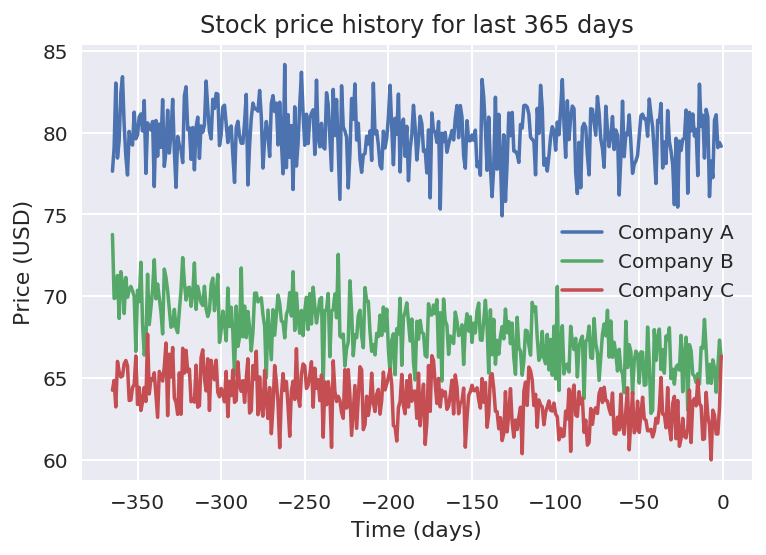

In [10]:
def gen_stock_price(days, initial_price):
    # stock price grows or shrinks linearly
    # not exceeding 10% per year (heuristic)
    trend = initial_price * (np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([1, -1]) + 1)
    # noise will be about 2%
    noise = .02 * np.random.randn(len(trend)) * trend
    return trend + noise

days = 365
initial_prices = [80, 70, 65]
for price in initial_prices:
    plt.plot(np.arange(-days, 0), gen_stock_price(days, price))
plt.title('Stock price history for last %d days' % days)
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend(['Company A', 'Company B', 'Company C','A'])

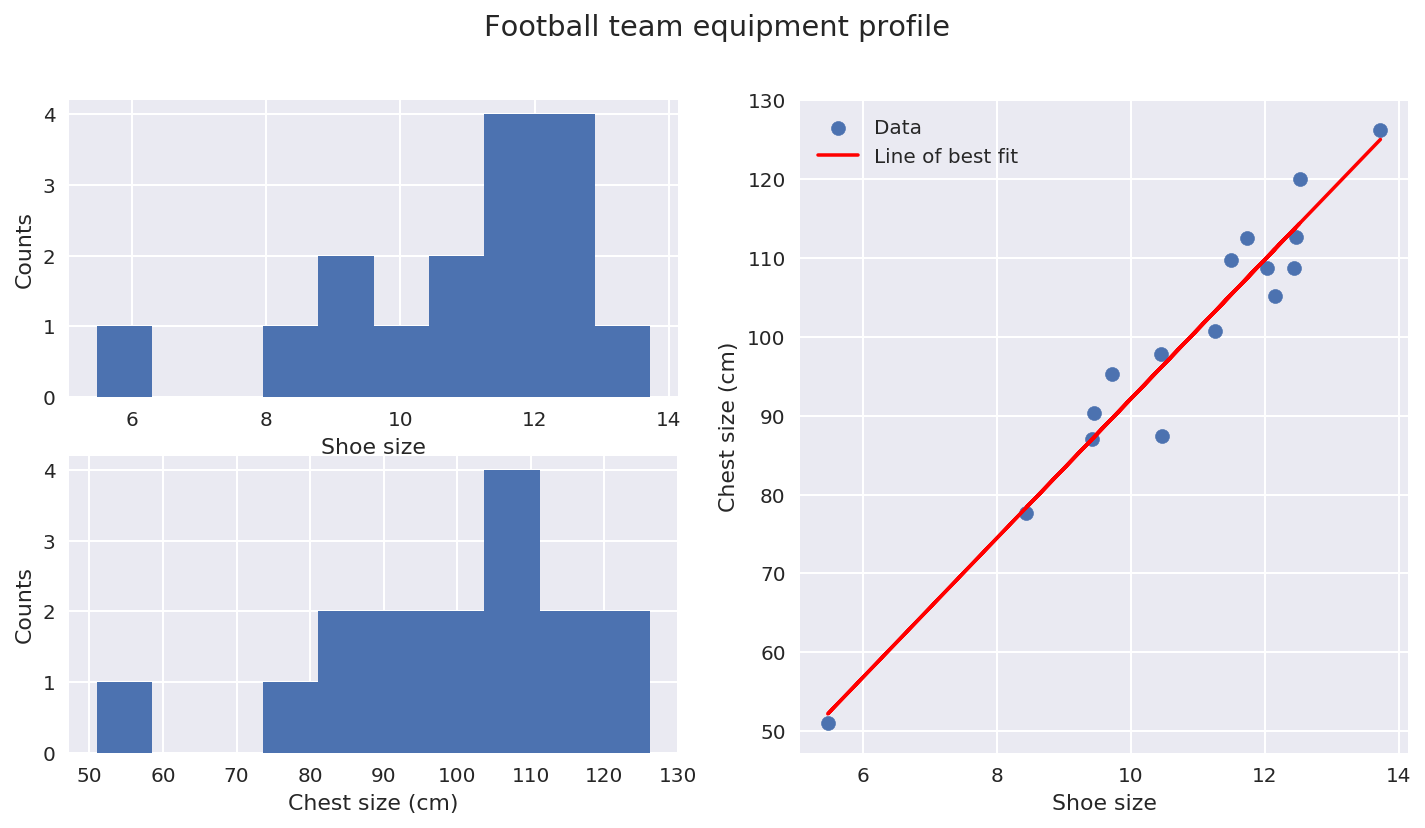

In [11]:
from scipy.stats import linregress

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jersey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)

    return shoe_sizes, jersey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Football team equipment profile')


ax1 = plt.subplot(221)
ax1.hist(shoes)
ax1.set_xlabel('Shoe size')
ax1.set_ylabel('Counts')

ax2 = plt.subplot(223)
ax2.hist(jerseys)
ax2.set_xlabel('Chest size (cm)')
ax2.set_ylabel('Counts')

ax3 = plt.subplot(122)
ax3.scatter(shoes, jerseys, label='Data')
ax3.set_xlabel('Shoe size')
ax3.set_ylabel('Chest size (cm)')

fit_line = linregress(shoes, jerseys)
ax3.plot(shoes, fit_line[1] + fit_line[0] * shoes, 'r', label='Line of best fit')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1])

Text(0, 0.5, 'Temperature (C)')

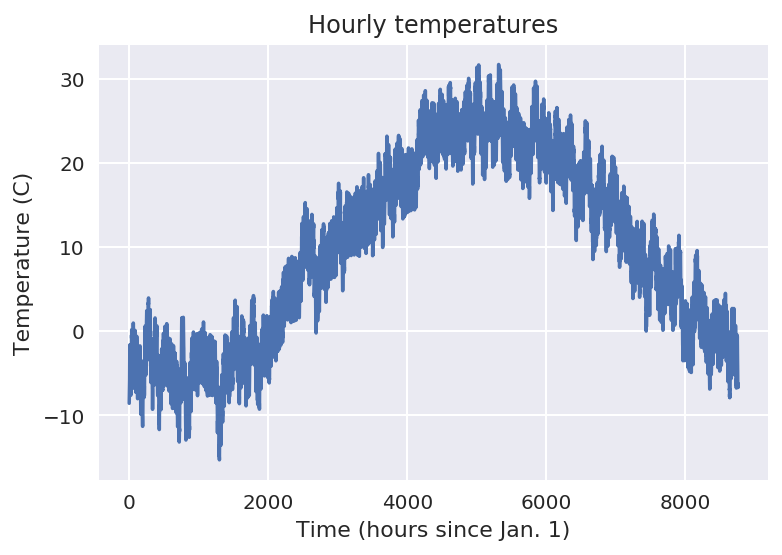

In [27]:
def gen_hourly_temps(days):
    ndays = len(days)
    seasonality = (-15 * np.cos((np.array(days) - 30) * 2.0 * np.pi / 365)).repeat(24) + 10
    solar = -3 * np.cos(np.arange(24 * ndays) * 2.0 * np.pi / 24)
    weather = np.interp(range(len(days) * 24), range(0, 24 * len(days), 24 * 2), 3 * np.random.randn(np.ceil(float(len(days)) / 2).astype(int)))
    noise = .5 * np.random.randn(24 * len(days))

    return seasonality + solar + weather + noise

days = np.arange(365)
hours = np.arange(days[0] * 24, (days[-1] + 1) * 24)
plt.plot(hours, gen_hourly_temps(days))
plt.title('Hourly temperatures')
plt.xlabel('Time (hours since Jan. 1)')
plt.ylabel('Temperature (C)')

In the examples above we've made use of the ubiquitous `plot` command, `subplot` for arranging multiple plots in one image, and `hist` for creating histograms. We've also used both the "state machine" (i.e. using a sequence of `plt.method` commands) and "object-oriented" (i.e. creating figure objects and mutating them) plotting paradigms. The Matplotlib package is very flexible and the possibilities for visualizing data are mostly limited by imagination. A great way to explore Matplotlib and other data visualization packages is by consulting their [gallery pages](https://matplotlib.org/gallery.html).

# Pandas

NumPy is useful for handling data as it lets us efficiently apply functions to whole data sets or select pieces of them. However, it can be difficult to keep track of related data that might be stored in different arrays, or the meaning of data stored in different rows or columns of the same array.

For example, in the previous section we had a 1-dimensional array for shoe sizes, and another 1-dimensional array for jersey sizes. If we wanted to look up the shoe and jersey size for a particular player, we'd have to remember his position in each array.

Alternatively, we could combine the two 1-dimensional arrays to make a 2-dimensional array with `n_players` rows and two columns (one for shoe size, one for jersey size). But once we combine the data, we now have to remember which column is shoe size and which column is jersey size.

The Pandas package introduces a very powerful tool for working with data in Python: the DataFrame. A DataFrame is a table. Each column represents a different type of data (sometimes called a **field**). The columns are named, so I could have a column called `'shoe_size'` and a column called `'jersey_size'`. I don't have to remember which column is which, because I can refer to them by name. Each row represents a different **record** or **entity** (e.g. player). I can also name the rows, so instead of remembering which row in my array corresponds with Ronaldinho, I can name the row 'Ronaldinho' and look up his shoe size and jersey size by name.

In [14]:
import pandas as pd

players = ['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane', 'Didier Drogba', 'Ronaldo', 'Yaya Toure', 
           'Frank Rijkaard', 'Diego Maradona', 'Mohamed Aboutrika', "Samuel Eto'o", 'George Best', 'George Weah', 
           'Roberto Donadoni']
shoes, jerseys = gen_football_team(len(players), 10, 100)

df = pd.DataFrame({'shoe_size': shoes, 'jersey_size': jerseys}, index = players)

df

,shoe_size,jersey_size
Ronaldinho,13.537352,131.323250
Pele,10.433561,106.647291
Lionel Messi,7.999904,78.843274
Zinedine Zidane,9.815625,93.130367
Didier Drogba,10.641721,102.891027
Ronaldo,9.889036,96.852220
Yaya Toure,9.303447,90.550524
Frank Rijkaard,8.631260,93.652491
Diego Maradona,10.837087,118.785229
Mohamed Aboutrika,8.287807,85.569451


In [16]:
# we can also make a dataframe using zip

df = pd.DataFrame(list(zip(shoes, jerseys)), columns = ['shoe_size', 'jersey_size'], index = players)

df

,shoe_size,jersey_size
Ronaldinho,13.537352,131.323250
Pele,10.433561,106.647291
Lionel Messi,7.999904,78.843274
Zinedine Zidane,9.815625,93.130367
Didier Drogba,10.641721,102.891027
Ronaldo,9.889036,96.852220
Yaya Toure,9.303447,90.550524
Frank Rijkaard,8.631260,93.652491
Diego Maradona,10.837087,118.785229
Mohamed Aboutrika,8.287807,85.569451


The DataFrame has similarities to both a `dict` and a NumPy `ndarray`. For example, we can retrieve a column from the DataFrame by using its name, just like we would retrieve an item from a `dict` using its key.

In [20]:
print(df['shoe_size'])

Ronaldinho           13.537352
Pele                 10.433561
Lionel Messi          7.999904
Zinedine Zidane       9.815625
Didier Drogba        10.641721
Ronaldo               9.889036
Yaya Toure            9.303447
Frank Rijkaard        8.631260
Diego Maradona       10.837087
Mohamed Aboutrika     8.287807
Samuel Eto'o         10.611992
George Best          10.554413
George Weah           8.874614
Roberto Donadoni      8.477742
Name: shoe_size, dtype: float64


And we can easily apply functions to the DataFrame, just like we would with a NumPy array.

In [21]:
print(np.log(df))

                   shoe_size  jersey_size
Ronaldinho          2.605453     4.877662
Pele                2.345028     4.669527
Lionel Messi        2.079430     4.367462
Zinedine Zidane     2.283975     4.534000
Didier Drogba       2.364782     4.633670
Ronaldo             2.291427     4.573186
Yaya Toure          2.230385     4.505908
Frank Rijkaard      2.155391     4.539591
Diego Maradona      2.382974     4.777317
Mohamed Aboutrika   2.114785     4.449328
Samuel Eto'o        2.361985     4.705309
George Best         2.356544     4.708809
George Weah         2.183195     4.487586
Roberto Donadoni    2.137444     4.504053


In [22]:
df.mean()

shoe_size       9.849683
jersey_size    99.927623
dtype: float64

We'll explore applying functions and analyzing data in a DataFrame in more depth later on. First we need to know how to retrieve, add, and remove data from a DataFrame.

We've already seen how to retrieve a column, what about retrieving a row? The most flexible syntax is to use the DataFrame's `loc` method.

In [42]:
print(df.loc['Ronaldo'])

shoe_size         9.88904
jersey_size       96.8522
position       goaltender
Name: Ronaldo, dtype: object


In [24]:
print(df.loc[['Ronaldo', 'George Best'], 'shoe_size'])

Ronaldo         9.889036
George Best    10.554413
Name: shoe_size, dtype: float64


In [25]:
# can also select position-based slices of data
print(df.loc['Ronaldo':'George Best', 'shoe_size'])

Ronaldo               9.889036
Yaya Toure            9.303447
Frank Rijkaard        8.631260
Diego Maradona       10.837087
Mohamed Aboutrika     8.287807
Samuel Eto'o         10.611992
George Best          10.554413
Name: shoe_size, dtype: float64


In [28]:
# for position-based indexing, we will typically use iloc
print(df.iloc[:5])

                 shoe_size  jersey_size
Ronaldinho       13.537352   131.323250
Pele             10.433561   106.647291
Lionel Messi      7.999904    78.843274
Zinedine Zidane   9.815625    93.130367
Didier Drogba    10.641721   102.891027


In [34]:
print(df.iloc[2:4])

                 shoe_size  jersey_size
Lionel Messi      7.999904    78.843274
Zinedine Zidane   9.815625    93.130367


In [31]:
# to see just the top of the DataFrame, use head
df.head()

,shoe_size,jersey_size
Ronaldinho,13.537352,131.323250
Pele,10.433561,106.647291
Lionel Messi,7.999904,78.843274
Zinedine Zidane,9.815625,93.130367
Didier Drogba,10.641721,102.891027


In [35]:
# of for the bottom use tail
df.tail()

,shoe_size,jersey_size
Mohamed Aboutrika,8.287807,85.569451
Samuel Eto'o,10.611992,110.532436
George Best,10.554413,110.919922
George Weah,8.874614,88.906526
Roberto Donadoni,8.477742,90.382716


Just as with a `dict`, we can add data to our DataFrame by simply using the same syntax as we would use to retrieve data, but matching it with an assignment.

In [39]:
# adding a new column
df['position'] = np.random.choice(['goaltender', 'defense', 'midfield', 'attack'], size=len(df))
df.head()

,shoe_size,jersey_size,position
Ronaldinho,13.537352,131.323250,midfield
Pele,10.433561,106.647291,defense
Lionel Messi,7.999904,78.843274,defense
Zinedine Zidane,9.815625,93.130367,attack
Didier Drogba,10.641721,102.891027,attack


In [38]:
np.random.choice(['goaltender', 'defense', 'midfield', 'attack'], size=len(df))

array(['goaltender', 'defense', 'goaltender', 'goaltender', 'goaltender',
       'midfield', 'defense', 'attack', 'midfield', 'goaltender',
       'attack', 'goaltender', 'goaltender', 'midfield'], dtype='<U10')

In [40]:
# adding a new row
df.loc['Dylan'] = {'jersey_size': 91, 'shoe_size': 9, 'position': 'midfield'}
df.loc['Dylan']

shoe_size             9
jersey_size          91
position       midfield
Name: Dylan, dtype: object

To delete data, we can use the DataFrame's `drop` method.

In [43]:
df.drop('Dylan')

,shoe_size,jersey_size,position
Ronaldinho,13.537352,131.323250,midfield
Pele,10.433561,106.647291,defense
Lionel Messi,7.999904,78.843274,defense
Zinedine Zidane,9.815625,93.130367,attack
Didier Drogba,10.641721,102.891027,attack
Ronaldo,9.889036,96.852220,goaltender
Yaya Toure,9.303447,90.550524,attack
Frank Rijkaard,8.631260,93.652491,goaltender
Diego Maradona,10.837087,118.785229,goaltender
Mohamed Aboutrika,8.287807,85.569451,midfield


In [44]:
df.drop('position', axis=1)

,shoe_size,jersey_size
Ronaldinho,13.537352,131.323250
Pele,10.433561,106.647291
Lionel Messi,7.999904,78.843274
Zinedine Zidane,9.815625,93.130367
Didier Drogba,10.641721,102.891027
Ronaldo,9.889036,96.852220
Yaya Toure,9.303447,90.550524
Frank Rijkaard,8.631260,93.652491
Diego Maradona,10.837087,118.785229
Mohamed Aboutrika,8.287807,85.569451


Notice when we executed `df.drop('position', axis=1)`, there was an entry for `Dylan` even though we had just executed `df.drop('Dylan')`. We have to be careful when using `drop`; many DataFrame functions return a _copy_ of the DataFrame. In order to make the change permanent, we either need to reassign `df` to the copy returned by `df.drop()` or we have to use the keyword `inplace`.

In [45]:
df = df.drop('Dylan')
print(df)

                   shoe_size  jersey_size    position
Ronaldinho         13.537352   131.323250    midfield
Pele               10.433561   106.647291     defense
Lionel Messi        7.999904    78.843274     defense
Zinedine Zidane     9.815625    93.130367      attack
Didier Drogba      10.641721   102.891027      attack
Ronaldo             9.889036    96.852220  goaltender
Yaya Toure          9.303447    90.550524      attack
Frank Rijkaard      8.631260    93.652491  goaltender
Diego Maradona     10.837087   118.785229  goaltender
Mohamed Aboutrika   8.287807    85.569451    midfield
Samuel Eto'o       10.611992   110.532436  goaltender
George Best        10.554413   110.919922    midfield
George Weah         8.874614    88.906526      attack
Roberto Donadoni    8.477742    90.382716      attack


In [47]:
df.drop('position', axis=1, inplace=True)
print(df)

KeyError: "['position'] not found in axis"

We'll explore Pandas in much more detail later in the course, since it has many powerful tools for data analysis. However, even with these tools you can already start to discover patterns in data and draw interesting conclusions.

*Copyright &copy; 2020 The Data Incubator.  All rights reserved.*